In [3]:
"""
Notebook usage: 

Plots:
    1. Latency for all sharding scenarios from one experiment.

Setup:
    In order to run, change the DATA_PATHS to corresponding files.
    To show only 2 and 3 shards, comment out the section with no shards.

Note: it is not guaranteed that the plotting will work for new data. Some of the variables where changed by hand,
 and need to be changed again when new data is plotted.
"""
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
DATA_PATH_NO_SHARDS = "Results_benchmarks3\Sorted_Results8_Shards1_06-02-2022_23-17-05.txt.csv"
DATA_PATH_2_SHARDS = "Results_benchmarks3\Sorted_Results6_Shards2_06-02-2022_22-04-01.txt.csv"
DATA_PATH_3_SHARDS = "Results_benchmarks3\Sorted_Results7_Shards3_06-02-2022_22-38-15.txt.csv"

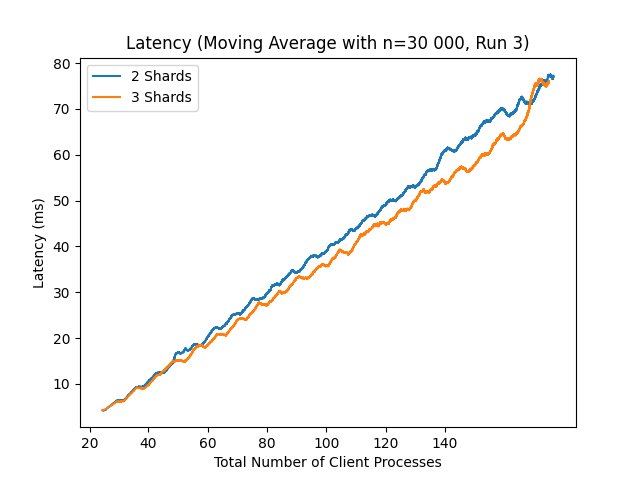

In [4]:

### 2 SHARDS
df: pd.DataFrame = pd.read_csv(DATA_PATH_2_SHARDS)
df: pd.DataFrame = df[df.action == "ReceivedResponse"]
df: pd.DataFrame = df["latency"].apply(lambda x: x*0.001)
df.drop(df.tail(10).index, inplace = True)
rol: pd.DataFrame  = df.rolling(30000).mean()
rol: pd.DataFrame = rol.dropna()
ax = rol.plot(x=range(140),xlabel= "Total Number of Client Processes", ylabel="Latency (ms)",title="Latency (Moving Average with n=30 000, Run 3)", label="2 Shards")
ax.plot()

### 3 SHARDS
df: pd.DataFrame = pd.read_csv(DATA_PATH_3_SHARDS)
df: pd.DataFrame = df[df.action == "ReceivedResponse"]
df: pd.DataFrame = df["latency"].apply(lambda x: x*0.001)
df.drop(df.tail(10).index, inplace = True)
rol: pd.DataFrame  = df.rolling(30000).mean()
rol: pd.DataFrame = rol.dropna()
ax = rol.plot(x=range(140), label="3 Shards")

# ## NO SHARDS
# df: pd.DataFrame = pd.read_csv(DATA_PATH_NO_SHARDS)
# df: pd.DataFrame = df[df.action == "ReceivedResponse"]
# df: pd.DataFrame = df["latency"].apply(lambda x: x*0.001)
# df.drop(df.tail(10).index, inplace = True)
# rol: pd.DataFrame  = df.rolling(30000).mean()
# rol: pd.DataFrame = rol.dropna()
# ax = rol.plot(x=range(140), label="No Shards")
# ax.plot()

plt.xticks([117,281215,570703,855962,1142750,1430320,1718243],[20,40,60,80,100,120,140]) # Written by hand
plt.legend(loc='upper left')
plt.show()
